# **Importing libraries and data**

In [1]:
import csv
import math
import pickle
import datetime as dt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn

from scipy import stats
from dateutil.parser import parse
from datetime import datetime
from IPython.display import display_html
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from yellowbrick.regressor import ResidualsPlot
from sklearn import linear_model
from pprint import pprint
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import AdaBoostRegressor

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('fivethirtyeight')

import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [16]:
################################################################################# USER DEFINED FIELDS ###########################################################################################
#################################################################################################################################################################################################
####### Load ADS using name and path

load_ads = pd.read_csv('gs://aes-analytics-0002-curated/Outage_Restoration/DPL_Curated_Datasets/DPL_Master_dataset_storm_all_v2.3.csv')
load_ads['TIME_OF_FIRST_CALL'] = pd.to_datetime(load_ads['TIME_OF_FIRST_CALL'], infer_datetime_format = True, errors = 'coerce')

# Getting info for training dataset
event_ = load_ads['EVENT']
outage_id = load_ads['OUTAGE_ID']

# Dropping unnecessary columns
load_ads = load_ads.drop(columns= ['Unnamed: 0','OUTAGE_ID', 'CIRCUIT', 'TIME_OF_FIRST_CALL', 'DEVICE',
                                   'STORM_TYPE','EVENT', 'DATE', 'DEVICESIZE', 'VOLTAGE'])
print(load_ads.shape)
display(load_ads.head())

(79979, 138)


,PHASE_A,PHASE_B,PHASE_C,PHASE_T,LFS_CUSTS,MED_CUSTS,EMR_CUSTS,UTL_CUSTS,MAJ_CUSTS,GOV_CUSTS,LRT_CUSTS,WIREDOWN_PTH,WIREDOWN_PTP,TREEONWIRE_PTH,TREEONWIRE_PTP,BROKENPOLE,FIREEXPLOSION,DAMAGEDTRANS,PRIORITY,CONFIDENCE,CUSTSTILLOUT,TTR,MAJOR,TORD_False,TORD_True,ACCOUNT_TYPE_COM,ACCOUNT_TYPE_CUS,ACCOUNT_TYPE_GOV,ACCOUNT_TYPE_IND,ACCOUNT_TYPE_RES,Day_flag,Hour_Sin,Hour_Cos,RANK_SUBSEQUENT_OTG,weekday,Weekend_flag,Marker_Location,Outages_in_last_1hr,Outages_in_last_2hr,Outages_in_last_3hr,Outages_in_last_4hr,Outages_in_last_5hr,Outages_in_last_6hr,Outages_in_last_7hr,Outages_in_last_8hr,Outages_in_last_9hr,Outages_in_last_10hr,Min_Distance_service_Center,Nearest_service_center,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,feelsLikeMax,heatIndexMin,heatIndexAvg,heatIndexMax,mslPresMin,mslPresAvg,mslPresMax,precip,radSolarMin,radSolarAvg,radSolarMax,radSolarTot,relHumMin,relHumAvg,relHumMax,sfcPresMin,sfcPresAvg,sfcPresMax,snowfall,spcHumMin,spcHumAvg,spcHumMax,tempMin,tempAvg,tempMax,windChillMin,windChillAvg,windChillMax,windDirAvg,windDir80mAvg,windDir100mAvg,windSpdMin,windSpdAvg,windSpdMax,windSpd80mMin,windSpd80mAvg,windSpd80mMax,windSpd100mMin,windSpd100mAvg,windSpd100mMax,wetBulbMin,wetBulbAvg,wetBulbMax,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,DEVICETYPE,TOPFUSE,TOTCUST_A,TOTCUST_B,TOTCUST_C,TOTCUST_T,UNDERGD,NORMALLYOPEN,TOTKVA_A,TOTKVA_B,TOTKVA_C,Total_Crew_dispatched,Total_Crew_available,Line_crew,Service_crew,Substation_crew,Network_crew,Contractor,rank,rank_cd,Slope_outages,Slope_ROC_outages,max_ROC_outages,max_index_ROC,weight_ROC,Total_Customers,Total_Key_Customers,Month_Sin,Month_Cos,Pole,Nearest_service_center_mod
0,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,True,False,H,0,351.40,0.0,8.0,0.0,False,False,False,False,False,False,0.258819,0.965926,1.0,Tuesday,False,Marker 25,0,0,0,0,0,2,3,4,4,4,9.594646,DSB,99.0,100.0,100.0,12.5,23.4,26.9,0.0,14.1,19.1,17.3,27.6,30.9,1006.5,1013.2,1021.3,1.31,0.0,29.7,154.9,711.9,77.4,84.0,90.5,972.7,979.1,986.8,10.8,1.7,2.8,3.1,17.3,27.6,30.9,0.0,14.1,19.1,52.0,54.0,54.0,14.3,20.3,23.3,16.9,22.7,25.7,16.6,22.5,25.5,16.1,26.2,29.2,13.6,9.0,14.1,1.0,13.1,1.169251,1.014496,FUSE,False,45.0,0.0,0.0,0.0,False,False,387.0,0.0,0.0,0,13,11,2,0,0,1,1.0,1.0,1.479751,7.105263e-01,2,5,1.0,45.0,0.0,0.5,0.866025,False,Center
1,False,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,H,0,188.82,0.0,3.0,0.0,False,False,False,False,False,True,0.965926,-0.258819,2.0,Tuesday,False,Marker 41,0,0,0,0,0,1,1,1,1,1,44.024088,Washington Court House,100.0,100.0,100.0,18.8,27.3,28.8,7.6,19.0,22.0,22.7,30.8,33.2,1004.4,1011.7,1020.8,1.39,0.0,29.4,140.0,705.1,80.9,86.9,91.0,967.4,974.7,983.0,0.5,2.3,3.2,3.4,22.7,30.8,33.2,7.6,19.0,22.0,54.0,56.0,56.0,13.8,18.2,21.1,16.0,20.2,23.1,15.8,20.0,23.0,21.5,29.5,31.3,10.5,7.3,15.6,0.0,10.1,1.124845,1.016126,FUSE,False,0.0,0.0,5.0,0.0,False,False,0.0,0.0,75.0,2,22,20,2,0,0,1,1.0,1.0,5.000000,-1.873501e-16,1,5,0.5,5.0,0.0,0.5,0.866025,False,Not_Center
2,False,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,H,0,87.47,0.0,2.0,0.0,False,False,False,False,False,True,0.965926,-0.258819,3.0,Tuesday,False,Marker 13,1,1,1,1,1,2,2,2,2,2,19.700468,Marysville,100.0,100.0,100.0,11.8,18.0,23.9,-1.6,6.7,16.4,16.2,22.0,27.3,1009.0,1016.1,1023.6,1.31,0.0,25.8,115.3,617.8,79.1,84.8,89.3,961.0,967.8,975.0,18.6,1.7,2.2,2.8,16.2,22.0,27.3,-1.6,6.7,16.4,47.0,49.0,49.0,12.9,20.5,24.1,15.5,23.2,27.0,15.3,22.9,26.6,15.2,20.8,26.1,11.1,11.2,14.0,0.0,10.2,1.128951,1.014568,FUSE,False,0.0,0.0,3.0,0.0,False,False,0.0,0.0,100.0,3,23,21,2,0,0,1,1.0,1.0,5.000000,-1.873501e-16,1,5,0.5,3.0,0.0,0.5,0.866025,False,Not_Center
3,False,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,H,0,85.97,0.0,6.0,0.0,True,False,False,False,False,True,0.707107,-0.707107,4

In [17]:
######################################################################## ALL USER DEFINED FUNCTION ARE LOGGED HERE #############################################################################
################################################################################################################################################################################################

# calculate rmse scores
def rmse(pred_test, y_test):
    return np.sqrt(((pred_test - y_test) ** 2).mean())

# calculate mape scores
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# get names of all categorical data present in data
def get_index_of_categorical_columns(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    return list(set(cols) - set(num_cols))


def do_union(lst1, lst2, lst3, lst4): 
    final_list = list(set(lst1) | set(lst2) | set(lst3) | set(lst4))
    return final_list 

def segment(x):
    if(x<=120):
        return "0-120"
    elif(x<=240):
        return "120-240"
    elif(x<=360):
        return "240-360"
    elif(x<=480):
        return "360-480"
    elif(x<=600):
        return "480-600"
    elif(x<=720):
        return "600-720"
    else:
        return ">720"
    
def segment_storm(x):
    if(x<=120):
        return "0-120"
    elif(x<=240):
        return "120-240"
    elif(x<=360):
        return "240-360"
    elif(x<=480):
        return "360-480"
    elif(x<=600):
        return "480-600"
    elif(x<=720):
        return "600-720"
    elif(x<=840):
        return "720-840"
    elif(x<=960):
        return "840-960"
    elif(x<=1080):
        return "960-1080"
    elif(x<=1200):
        return "1080-1200"
    elif(x<=1320):
        return "1200-1320"
    elif(x<=1440):
        return "1320-1440"
    else:
        return ">1440"
    
def style_diag(data):
    diag_mask = pd.DataFrame("", index=data.index, columns=data.columns)
    min_axis = min(diag_mask.shape)
    diag_mask.iloc[range(min_axis), range(min_axis)] = 'background-color:#aed581'
    return diag_mask

def customer_metrics(y_test,y_test_pred):
    df_pred = pd.DataFrame(data={'actualRaw': y_test, 'predictedRaw': y_test_pred})
    df_pred['Actual_segment'] = df_pred['actualRaw'].apply(segment)
    df_pred['Prediction_segment'] = df_pred['predictedRaw'].apply(segment)
    business_KPI = df_pred[['Actual_segment','Prediction_segment']]

    #conversion to percentage
    business_KPI = pd.pivot_table(business_KPI, index='Actual_segment',columns=['Prediction_segment'], values='Actual_segment', aggfunc=lambda x: len(x))
    business_KPI["total"] =  business_KPI.sum(axis=1)
    business_KPI.columns.name = 'Predicted_Values'
    business_KPI.index.name = 'Actual_Values'

    # Add the grand total row, summing all values in a column
    business_KPI.loc['total', :] = business_KPI.sum()
    business_KPI = business_KPI.round(0)
    return business_KPI

def customer_metrics_storm(y_test,y_test_pred):
    df_pred = pd.DataFrame(data={'actualRaw': y_test, 'predictedRaw': y_test_pred})
    df_pred['Actual_segment'] = df_pred['actualRaw'].apply(segment_storm)
    df_pred['Prediction_segment'] = df_pred['predictedRaw'].apply(segment_storm)
    business_KPI = df_pred[['Actual_segment','Prediction_segment']]

    #conversion to percentage
    business_KPI = pd.pivot_table(business_KPI, index='Actual_segment',columns=['Prediction_segment'], values='Actual_segment', aggfunc=lambda x: len(x))
    business_KPI["total"] =  business_KPI.sum(axis=1)
    business_KPI.columns.name = 'Predicted_Values'
    business_KPI.index.name = 'Actual_Values'

    # Add the grand total row, summing all values in a column
    business_KPI.loc['total', :] = business_KPI.sum()
    business_KPI = business_KPI.round(0)
    return business_KPI

# Preprocessing Data 

## Dummifying columns with Categorical Values

In [22]:
object_columns = load_ads.loc[:, (load_ads.dtypes == object) | (load_ads.dtypes == bool)]
print(list(object_columns.columns))

# Dummifying one hot code encoding
ads = load_ads[:]
ads = pd.get_dummies(ads, columns=['CONFIDENCE', 'weekday', 'Marker_Location', 'Nearest_service_center',
                                   'DEVICETYPE','Nearest_service_center_mod'])
print(ads.shape)

# Dropping duplicate columns
ads = ads.loc[:,~ads.columns.duplicated()]

print(ads.shape)

['PHASE_A', 'PHASE_B', 'PHASE_C', 'PHASE_T', 'WIREDOWN_PTH', 'WIREDOWN_PTP', 'TREEONWIRE_PTH', 'TREEONWIRE_PTP', 'BROKENPOLE', 'FIREEXPLOSION', 'DAMAGEDTRANS', 'PRIORITY', 'CONFIDENCE', 'ACCOUNT_TYPE_COM', 'ACCOUNT_TYPE_CUS', 'ACCOUNT_TYPE_GOV', 'ACCOUNT_TYPE_IND', 'ACCOUNT_TYPE_RES', 'Day_flag', 'weekday', 'Weekend_flag', 'Marker_Location', 'Nearest_service_center', 'DEVICETYPE', 'TOPFUSE', 'UNDERGD', 'NORMALLYOPEN', 'Pole', 'Nearest_service_center_mod']
(79979, 218)
(79979, 218)


# Distribution and transformation of Y-variable

## Target Variable Analysis: Is it Normal?

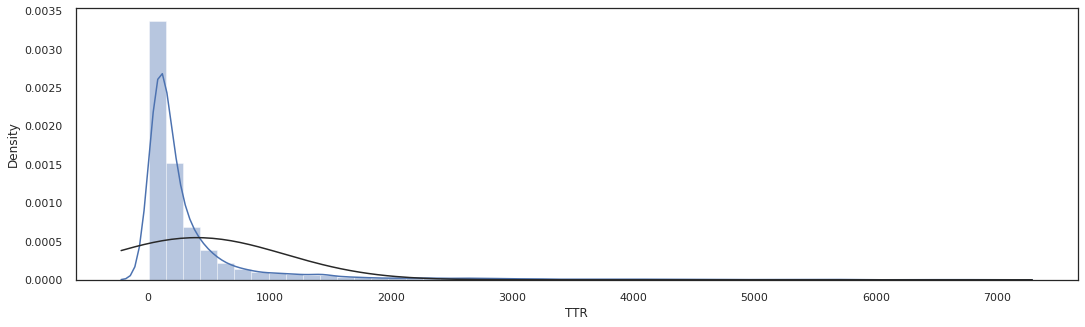

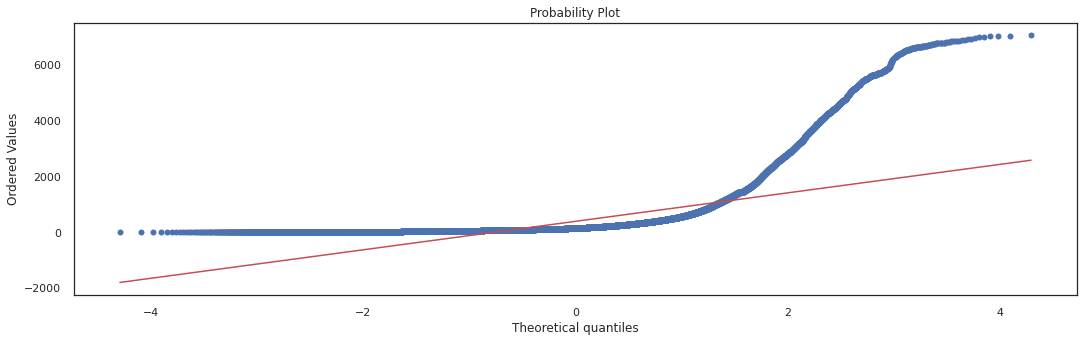

In [23]:
from scipy.stats import norm

sns.set(rc={'figure.figsize':(16,5)})
sns.set_style("white")

sns.distplot(ads['TTR'],fit=norm);
fig = plt.figure()
res = stats.probplot(ads['TTR'], plot=plt)

#### **Log Transformation of Tanget Variable (TTR)**

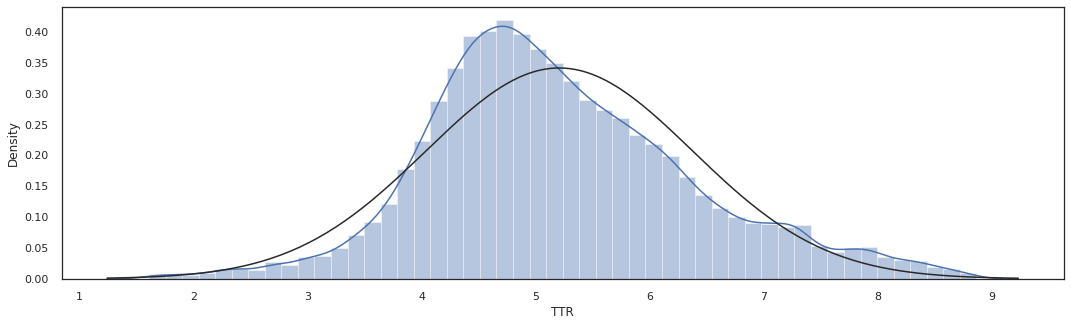

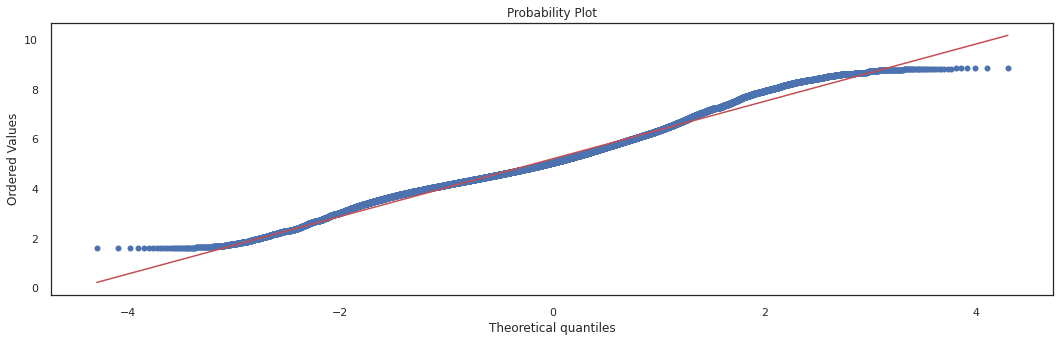

In [24]:
# Apply log e tranformation to the dataset
ads['TTR'] = np.log(ads['TTR'])
from scipy.stats import norm

sns.set(rc={'figure.figsize':(16,5)})
sns.set_style("white")

sns.distplot(ads['TTR'],fit=norm);
fig = plt.figure()
res = stats.probplot(ads['TTR'], plot=plt)

In [25]:
%%time

#####################################################################
#####################################################################
#####################################################################
## FEATURE SELECTION : MAX VOTING REGIME ##
X = ads.drop(['TTR'],axis=1)
y = ads['TTR']

# ols = LinearRegression()
# ols.fit(X.values, y.values)
# pls = PLSRegression(n_components=15)
# pls.fit(X.values, y.values)
# rf = RandomForestRegressor(n_estimators=150, n_jobs = -1)
# rf.fit(X,y)
# xg = xgb.XGBRegressor(n_jobs=-1, max_depth=15)
# xg.fit(X,y)

ad = AdaBoostRegressor()
ad.fit(X,y)

# ols = LinearRegression()
# ols.fit(X.values, y.values)
# pls = PLSRegression(n_components=15)
# pls.fit(X.values, y.values)
# rf = RandomForestRegressor(n_estimators=150, n_jobs = -1)
# rf.fit(X,y)
# xg = xgb.XGBRegressor(n_jobs=-1, max_depth=15)
# xg.fit(X,y)

# rf = RandomForestRegressor(n_estimators=150, n_jobs = -1)
# rf.fit(X,y)
# xg = xgb.XGBRegressor(n_jobs=-1, max_depth=15)
# xg.fit(X,y)

CPU times: user 2min 55s, sys: 7.88 s, total: 3min 3s
Wall time: 3min 3s


AdaBoostRegressor()

In [26]:
# rftrees = pd.DataFrame({'Features': X.columns, 'Importance_Score_Random_Forest': rf.feature_importances_}).sort_values(by='Importance_Score_Random_Forest',ascending=False)
# xgboost = pd.DataFrame({'Features': X.columns, 'Importance_Score_XGBoost': xg.feature_importances_}).sort_values(by='Importance_Score_XGBoost',ascending=False)

# rftrees.reset_index(drop=True,inplace=True)
# xgboost.reset_index(drop=True,inplace=True)

# rftrees = rftrees.head(40)
# xgboost = xgboost.head(40)

# ols_reg = pd.DataFrame({'Features': X.columns, 'Importance_Score_ols': ols.coef_}).sort_values(by='Importance_Score_ols',ascending=False)
# pls_reg = pd.DataFrame({'Features': X.columns, 'Importance_Score_PLS': pls.coef_.ravel()}).sort_values(by='Importance_Score_PLS',ascending=False)
# rftrees = pd.DataFrame({'Features': X.columns, 'Importance_Score_Random_Forest': rf.feature_importances_}).sort_values(by='Importance_Score_Random_Forest',ascending=False)
# xgboost = pd.DataFrame({'Features': X.columns, 'Importance_Score_XGBoost': xg.feature_importances_}).sort_values(by='Importance_Score_XGBoost',ascending=False)
adaboost = pd.DataFrame({'Features': X.columns, 'Importance_Score_AdaBoost': ad.feature_importances_}).sort_values(by='Importance_Score_AdaBoost',ascending=False)


# ols_reg.reset_index(drop=True,inplace=True)
# pls_reg.reset_index(drop=True,inplace=True)
# rftrees.reset_index(drop=True,inplace=True)
# xgboost.reset_index(drop=True,inplace=True)
adaboost.reset_index(drop=True,inplace=True)

# ols_reg = ols_reg.head(15)
# pls_reg = pls_reg.head(15)
# rftrees = rftrees.head(40)
# xgboost = xgboost.head(40)

adaboost = adaboost.head(80)

## **Feature Importance using Ordinary Least Square**

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.barplot(x="Importance_Score_ols", y="Features", data=ols_reg, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : Lasso')

In [ ]:
display(ols_reg)

## **Feature Importance using Partial Least Square**

In [ ]:
# sns.set(rc={'figure.figsize':(18,5)})
# sns.set_style("white")
# ax = sns.barplot(x="Importance_Score_PLS", y="Features", data=pls_reg , palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : PLS')

In [ ]:
# display(pls_reg)

## **Feature Importance using Random Forest**

In [ ]:
# sns.set(rc={'figure.figsize':(18,5)})
# sns.set_style("white")
# ax = sns.barplot(x="Importance_Score_Random_Forest", y="Features", data=rftrees, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : Random Forest')

In [ ]:
# display(rftrees)

## **Feature Importance using XGBoost**

In [ ]:
# sns.set(rc={'figure.figsize':(18,5)})
# sns.set_style("white")
# ax = sns.barplot(x="Importance_Score_XGBoost", y="Features", data=xgboost, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : XGBoost')

In [ ]:
# display(xgboost)

## **Feature Importance using AdaBoost**

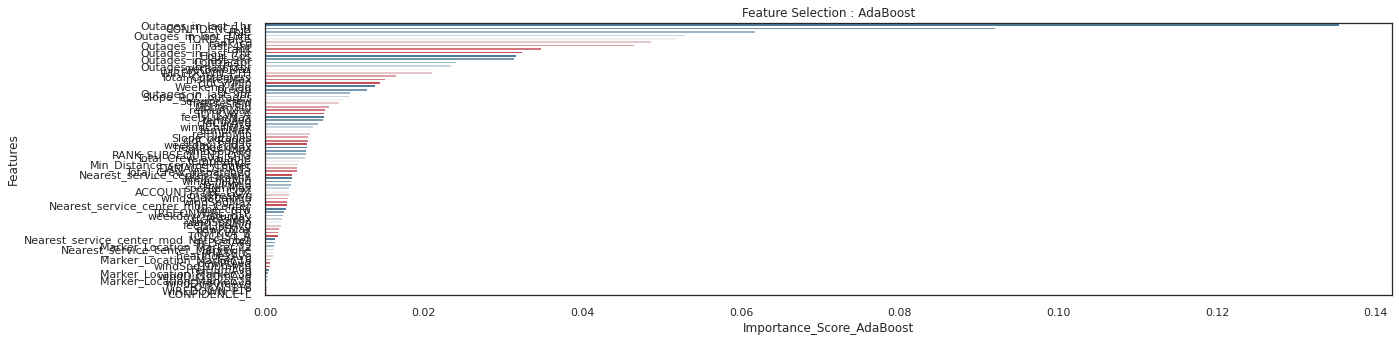

In [27]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.barplot(x="Importance_Score_AdaBoost", y="Features", data=adaboost, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : AdaBoost')

In [29]:
display(adaboost)

,Features,Importance_Score_AdaBoost
0,Outages_in_last_1hr,0.135331
1,CONFIDENCE_H,0.091993
2,Pole,0.061750
3,Outages_in_last_10hr,0.052982
4,TORD_False,0.052041
5,rank_cd,0.048695
6,Outages_in_last_4hr,0.046546
7,rank,0.034769
8,Outages_in_last_7hr,0.032377
9,Hour_Cos,0.031699


## **Final Features Selected after Union (Max Voting Regime)**

In [32]:
# final_features = pd.DataFrame()
# final_features['XG Boost'] = xgboost.Features
# final_features['Random Forest'] = rftrees.Features


# display(final_features)

# final_features = list(set().union(xgboost.Features,rftrees.Features))
# print("/n Features selected:")
# print(len(final_features), "No. of Features Selected")
# print(final_features)

# final_features = pd.DataFrame()
# final_features['XG Boost'] = xgboost.Features
# final_features['Random Forest'] = rftrees.Features
# final_features['OLS'] = ols_reg.Features
# final_features['PLS'] = pls_reg.Features


# display(final_features)

# final_features = do_union(list(xgboost.Features), list(rftrees.Features), list(ols_reg.Features), list(pls_reg.Features))
# print("/n Features selected:")
# print(len(final_features), "No. of Features Selected")
# print(final_features)

final_features = adaboost.Features.to_list()

### **View Data-set after feature selection**

In [33]:
ads_v1 = ads[final_features]
ads_v1['TTR'] = ads['TTR']
display(ads_v1.head())

,Outages_in_last_1hr,CONFIDENCE_H,Pole,Outages_in_last_10hr,TORD_False,rank_cd,Outages_in_last_4hr,rank,Outages_in_last_7hr,Hour_Cos,Outages_in_last_2hr,Contractor,Outages_in_last_3hr,wetBulbMax,WIREDOWN_PTH,Total_Customers,mslPresMax,cldCvrMin,Weekend_flag,precip,Outages_in_last_9hr,Slope_ROC_outages,Service_crew,mslPresMin,Month_Sin,relHumMax,TOTKVA_A,feelsLikeMax,tempAvg,cldCvrAvg,windChillMax,tempMax,relHumMin,Slope_outages,cldCvrRange,weekday_Friday,heatIndexMax,windSpdAvg,RANK_SUBSEQUENT_OTG,Total_Crew_available,tempRange,Min_Distance_service_Center,DAMAGEDTRANS,Total_Crew_dispatched,Nearest_service_center_Sidney,feelsLikeMin,windChillAvg,dewPtMin,spcHumMax,ACCOUNT_TYPE_GOV,mslPresAvg,windSpd80mMin,windSpdMax,Nearest_service_center_mod_Center,Line_crew,TREEONWIRE_PTP,weekday_Saturday,sfcPresMax,windSpdMin,feelsLikeAvg,dewPtMax,TOTKVA_B,TOTCUST_A,Nearest_service_center_mod_Not_Center,sfcPresAvg,Marker_Location_Marker 22,Nearest_service_center_Marysville,PHASE_C,heatIndexAvg,Marker_Location_Marker 16,dewPtAvg,windSpd100mMin,relHumAvg,Marker_Location_Marker 30,windDir100mAvg,Marker_Location_Marker 26,windDir80mAvg,TOTCUST_C,WIREDOWN_PTP,CONFIDENCE_L,TTR
0,0,1,False,4,8.0,1.0,0,1.0,3,0.965926,0,1,0,29.2,False,45.0,1021.3,99.0,False,1.31,4,7.105263e-01,2,1006.5,0.5,90.5,387.0,19.1,27.6,100.0,19.1,30.9,77.4,1.479751,1.0,0,30.9,20.3,1.0,13,13.6,9.594646,True,0,0,0.0,14.1,12.5,3.1,False,1013.2,16.9,23.3,1,11,False,0,986.8,14.3,14.1,26.9,0.0,45.0,0,979.1,0,0,False,27.6,0,23.4,16.6,84.0,0,54.0,0,54.0,0.0,False,0,5.861925
1,0,1,False,1,3.0,1.0,0,1.0,1,-0.258819,0,1,0,31.3,False,5.0,1020.8,100.0,False,1.39,1,-1.873501e-16,2,1004.4,0.5,91.0,0.0,22.0,30.8,100.0,22.0,33.2,80.9,5.000000,0.0,0,33.2,18.2,2.0,22,10.5,44.024088,False,2,0,7.6,19.0,18.8,3.4,False,1011.7,16.0,21.1,0,20,False,0,983.0,13.8,19.0,28.8,0.0,0.0,1,974.7,0,0,True,30.8,0,27.3,15.8,86.9,0,56.0,0,56.0,5.0,False,0,5.240794
2,1,1,False,2,2.0,1.0,1,1.0,2,-0.258819,1,1,1,26.1,False,3.0,1023.6,100.0,False,1.31,2,-1.873501e-16,2,1009.0,0.5,89.3,0.0,16.4,22.0,100.0,16.4,27.3,79.1,5.000000,0.0,0,27.3,20.5,3.0,23,11.1,19.700468,False,3,0,-1.6,6.7,11.8,2.8,False,1016.1,15.5,24.1,0,21,False,0,975.0,12.9,6.7,23.9,0.0,0.0,1,967.8,0,1,True,22.0,0,18.0,15.3,84.8,0,49.0,0,49.0,3.0,False,0,4.471296
3,0,1,False,3,6.0,1.0,2,1.0,2,-0.707107,1,1,2,29.4,False,10.0,1021.8,100.0,False,1.36,3,-2.500000e+00,2,1005.6,0.5,92.0,0.0,18.5,27.8,100.0,18.5,30.9,82.6,2.875000,0.0,0,30.9,19.2,4.0,29,11.1,16.515180,False,6,0,3.7,14.8,16.1,3.2,False,1013.0,16.0,23.0,0,27,False,0,981.4,13.6,14.8,26.9,0.0,0.0,1,973.5,0,0,True,27.8,0,24.6,15.8,88.0,0,53.0,0,54.0,10.0,False,0,4.453998
4,1,1,False,5,1.0,1.0,4,1.0,4,-0.866025,2,1,3,28.4,False,64.0,1021.8,100.0,False,1.36,5,-2.700000e+00,2,1007.5,0.5,89.2,0.0,18.9,26.1,100.0,18.9,29.6,76.9,2.152778,0.0,0,29.6,20.7,6.0,31,12.8,2.921356,False,3,0,-0.8,12.1,11.7,3.0,False,1014.1,16.5,24.3,1,29,False,0,990.5,14.1,12.1,26.2,0.0,0.0,0,983.0,0,0,True,26.1,0,21.7,16.3,83.0,0,52.0,1,52.0,64.0,False,0,5.040841


### **Correlation Matrix of Selected Variables**

In [ ]:
#whitegrid
sns.set_style('whitegrid')
#compute correlation matrix...
corr_matrix=ads_v1.corr(method='spearman')
#...and show it with a heatmap
#first define the dimension
plt.figure(figsize=(30,30))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr_matrix,2), mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

### **BoxPlot of selected Variables**

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("white")
for i, col in enumerate(list(ads.columns.values)):
    plt.subplot(14,5,i+1)
    ads.boxplot(col)
    plt.grid()
    plt.tight_layout()

### **Distribution Plot of selected Variables**

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style("white")
for i, col in enumerate(list(ads.columns.values)):
    plt.subplot(14,5,i+1)
    sns.distplot(ads[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

# **Train-Test Split using sklearn**

In [62]:
X = ads[final_features]
X['Event'] = event_
y = ads['TTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(columns = ['Event'])
event_ = X_test['Event']
X_test = X_test.drop(columns = ['Event'])
print('\n')
print('\n')
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))
print('\n')
print('\n')





63983 15996
63983 15996






# **Building Baseline AdaBoost Model**
- AdaBoost is one of the first boosting algorithms to be adapted in solving practices. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”.
- The weak learners in AdaBoost are decision trees with a single split, called decision stumps.
- AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.
- AdaBoost algorithms can be used for both classification and regression problem.

In [63]:
model_col = ['MODEL_NAME' , 'TRAIN_MSE', 'TRAIN_RMSE', 'TRAIN_MAE', 'TRAIN_MAPE', 'TRAIN_R2','TRAIN__Adj_R2', 'TEST_MSE', 'TEST_RMSE', 'TEST_MAE', 'TEST_MAPE', 'TEST_R2','Test__Adj_R2']
model_result_df = pd.DataFrame(columns=model_col)
data_train_list = pd.DataFrame()
data_test_list = pd.DataFrame()
i=0

In [ ]:
ad_base = AdaBoostRegressor(n_estimators = 300, learning_rate = 0.1, loss = 'exponential')
ad_base.fit(X_train, y_train)

y_train_pred = ad_base.predict(X_train)
y_train_pred = np.exp(y_train_pred)

y_test_pred = ad_base.predict(X_test)
y_test_pred = np.exp(y_test_pred)

y_train = np.exp(y_train)
y_test = np.exp(y_test)

n = len(y_train)
p = len(final_features)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = rmse(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
                   
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = rmse(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

data_train = pd.DataFrame({'Model':'ADB Baseline', 'Train_Predicted': list(y_train_pred),'Train_Actual': list(y_train) })
data_train_list = data_train_list.append(data_train)
data_train_list.reset_index(drop=True, inplace=True)

data_test = pd.DataFrame({'Model':'ADB Baseline', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y_test)})
data_test_list = data_test_list.append(data_test)
data_test_list.reset_index(drop=True, inplace=True)

model_result_df.loc[i] = ['ADB Baseline', mse_train, rmse_train, mae_train, mape_train, r2_train,adj_r2_train, mse_test, rmse_test, mae_test, mape_test, r2_test, adj_r2_test]
i = i + 1

In [ ]:
y_test.max()

6990.879999999995

In [ ]:
model_result_df.head()

,MODEL_NAME,TRAIN_MSE,TRAIN_RMSE,TRAIN_MAE,TRAIN_MAPE,TRAIN_R2,TRAIN__Adj_R2,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE,TEST_R2,Test__Adj_R2
0,ADB Baseline,343300.649917,585.918638,248.396222,75.291202,0.353657,0.352848,332800.513557,576.888649,246.020196,75.512671,0.358461,0.357658


In [39]:
y_test_baseline = y_test
y_test_pred_baseline = y_test_pred

## **Random Forest Baseline: Actual vs Fitted PLot**

Text(0.5, 1.0, 'Actual vs Fitted : ADB Baseline Baseline')

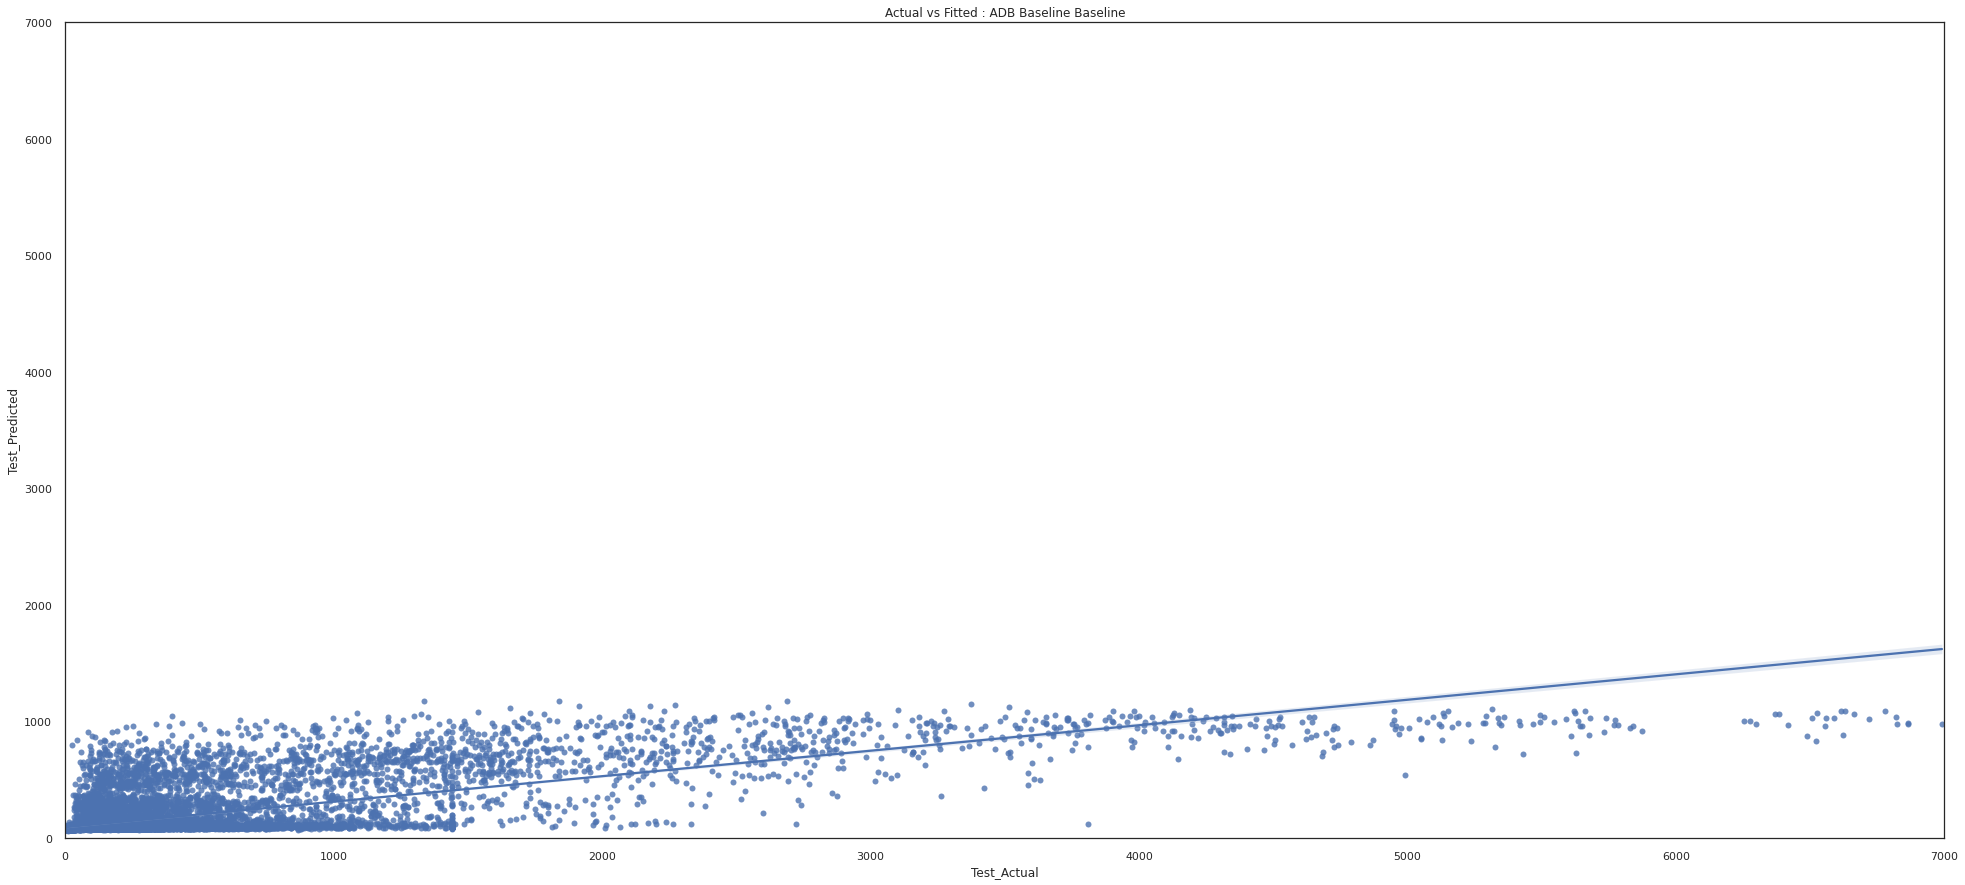

In [60]:
sns.set(rc={'figure.figsize':(30,15)})
sns.set_style("white")

ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=data_test_list[data_test_list.Model=='ADB Baseline'])
ax.set_xlim(0,7000)
ax.set_ylim(0,7000)
ax.set_title('Actual vs Fitted : ADB Baseline Baseline')

#### **Random Forest Baseline : Residual PLot**

In [ ]:
sns.set(rc={'figure.figsize':(30,7)})
sns.set_style("white")

visualizer = ResidualsPlot(xg_base)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

# **Random Forest Parameters**
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_rs = RandomForestRegressor(bootstrap = False, random_state = 1234, max_features = 0.3, criterion = 'mse', max_leaf_nodes = 1000, 
                                min_samples_split = 2, n_estimators = 500, min_samples_leaf = 10)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_rs.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 30)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 0.3]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 60, num = 8)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3, 4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [6,8,10,12,14,16]

# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['mse']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

pprint(random_grid)

# **Random Search Training**
- The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively)
- More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [ ]:
%%time

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_rs = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_rs_random = RandomizedSearchCV(estimator = rf_rs, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, scoring='neg_mean_absolute_error', random_state=1234, n_jobs = -1)

# Fit the random search model
rf_rs_random.fit(X_train, y_train)

In [ ]:
print(rf_rs_random.best_params_)

#### **Building Random Search Best Model**

In [ ]:
rf_rs = RandomForestRegressor(n_jobs=-1, random_state=1234)
rf_rs.set_params(**rf_rs_random.best_params_)

rf_rs.fit(X_train, y_train)

y_train_pred = rf_rs.predict(X_train)
# y_train_pred = np.exp(y_train_pred)

y_test_pred = rf_rs.predict(X_test)
# y_test_pred = np.exp(y_test_pred)

# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = rmse(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
                   
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = rmse(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

data_train = pd.DataFrame({'Model':'Random Forest Random Search', 'Train_Predicted': list(y_train_pred),'Train_Actual': list(y_train) })
data_train_list = data_train_list.append(data_train)
data_train_list.reset_index(drop=True, inplace=True)

data_test = pd.DataFrame({'Model':'Random Forest Random Search', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y_test)})
data_test_list = data_test_list.append(data_test)
data_test_list.reset_index(drop=True, inplace=True)

model_result_df.loc[i] = ['Random Forest Random Search', mse_train, rmse_train, mae_train, mape_train, r2_train,adj_r2_train, mse_test, rmse_test, mae_test, mape_test, r2_test,adj_r2_test]
i = i + 1

In [ ]:
model_result_df.head()

In [ ]:

y_test_random_search = y_test
y_test_pred_random_search = y_test_pred
# y_train = np.log(y_train)
# y_test = np.log(y_test)

#### **Random Forest Random Search: Actual vs Fitted PLot**

In [ ]:
sns.set(rc={'figure.figsize':(18,7)})
sns.set_style("white")
ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=data_test_list[data_test_list.Model=='Random Forest Random Search'], line_kws={"color": "lightgreen"})
ax.set_xlim(0,5000)
ax.set_ylim(0,5000)
ax.set_title('Actual vs Fitted : Random Forest Random Search')

#### **Random Forest Random Search: Residual PLot**

In [ ]:
sns.set(rc={'figure.figsize':(18,7)})
sns.set_style("white")

visualizer = ResidualsPlot(rf_rs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

# **Grid Search with Cross Validation**
- Random search allowed us to narrow down the range for each hyperparameter
- Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try
- We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

In [ ]:
print(rf_rs_random.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
# {'n_estimators': 350, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

param_grid = {
    'bootstrap': [True, False],
     'max_depth': [30, 36, 40],
     'max_features': ['sqrt'],
     'min_samples_leaf': [5, 6, 7],
     'min_samples_split': [2, 3, 4],
     'n_estimators': [500, 517, 534]
}

# Create a based model
rf_gs = RandomForestRegressor(random_state = 1234)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gs, param_grid = param_grid, cv = 3, scoring='neg_mean_absolute_error', n_jobs = -1, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best Paramters for Random Forest Model using Grid Search:")
print(grid_search.best_params_)

#### **Building Grid Search Best Model**

In [ ]:
rf_gs = RandomForestRegressor(n_jobs=-1, random_state=1234)
rf_gs.set_params(**grid_search.best_params_)

rf_gs.fit(X_train, y_train)

y_train_pred = rf_gs.predict(X_train)
# y_train_pred = np.exp(y_train_pred)

y_test_pred = rf_gs.predict(X_test)
# y_test_pred = np.exp(y_test_pred)

# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = rmse(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
                   
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = rmse(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

data_train = pd.DataFrame({'Model':'Random Forest Grid Search', 'Train_Predicted': list(y_train_pred),'Train_Actual': list(y_train) })
data_train_list = data_train_list.append(data_train)
data_train_list.reset_index(drop=True, inplace=True)

data_test = pd.DataFrame({'Model':'Random Forest Grid Search', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y_test)})
data_test_list = data_test_list.append(data_test)
data_test_list.reset_index(drop=True, inplace=True)

model_result_df.loc[i] = ['Random Forest Grid Search', mse_train, rmse_train, mae_train, mape_train, r2_train,adj_r2_train, mse_test, rmse_test, mae_test, mape_test, r2_test,adj_r2_test]
i = i + 1

In [ ]:
model_result_df

In [ ]:
data_train_list.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Train_Data_DPL_DataRobo_RF_Ckt_lvl_OT_10292020_1.csv')
data_test_list.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Test_Data_DPL_Datarobo_RF_Ckt_lvl_OT_10292020_1.csv')

In [ ]:
y_test_grid_search = y_test
y_test_pred_grid_search = y_test_pred

y_train = np.log(y_train)
y_test = np.log(y_test)

#### **Random Forest Grid Search: Actual vs Fitted Plot**

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=data_test_list[data_test_list.Model=='Random Forest Grid Search'], line_kws={"color": "lightblue"})
ax.set_xlim(0,5000)
ax.set_ylim(0,5000)
ax.set_title('Actual vs Fitted : Random Forest Grid Search CV')

#### **Random Forest Grid Search: Residual PLot**

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")

visualizer = ResidualsPlot(rf_gs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

# **Selecting the best model**

In [ ]:
model_result_df

## **Model business metric** Storm + Bluesky

In [ ]:

y_test_pred = y_test_pred_grid_search
y_test = y_test_grid_search

business_KPI = customer_metrics(y_test,y_test_pred)
y_train = np.log(y_train)
y_test = np.log(y_test)
y_test_pred = np.log(y_test_pred)

df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage

## Splitting the metric in Storm and Blue sky events

In [ ]:
df_result = pd.DataFrame(data={'y_test': np.exp(y_test), 'y_test_pred': np.exp(y_test_pred) , 'EVENT': event_})
df_result.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Testdata_DPL_Datarobo_RF_Ckt_lvl_10292020_1.csv')
model_col = ['EVENT' , 'TEST_MSE', 'TEST_RMSE', 'TEST_MAE', 'TEST_MAPE']
best_model_result_df = pd.DataFrame(columns=model_col)
i=0

In [ ]:
mse_test = mean_squared_error(df_result.y_test, df_result.y_test_pred)
rmse_test = rmse(df_result.y_test, df_result.y_test_pred)
mae_test = mean_absolute_error(df_result.y_test, df_result.y_test_pred)
mape_test = mean_absolute_percentage_error(df_result.y_test, df_result.y_test_pred)
best_model_result_df.loc[i] = ['Random Forest Grid Search All', mse_test, rmse_test, mae_test, mape_test]
i = i + 1

mse_test = mean_squared_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
rmse_test = rmse(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
mae_test = mean_absolute_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
mape_test = mean_absolute_percentage_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
best_model_result_df.loc[i] = ['Random Forest Grid Search Storm',mse_test, rmse_test, mae_test, mape_test]
i = i + 1

mse_test = mean_squared_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
rmse_test = rmse(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
mae_test = mean_absolute_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
mape_test = mean_absolute_percentage_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
best_model_result_df.loc[i] = ['Random Forest Grid Search Bluesky', mse_test, rmse_test, mae_test, mape_test]
i = i + 1

best_model_result_df

### Residual plot

#### Storm + Bluesky

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result, line_kws={"color": "lightblue"})
ax.set_xlim(0,4000)
ax.set_ylim(0,4000)
ax.set_title('Actual vs Fitted : Random Forest Baseline')
ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

#### Storm

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result[df_result.EVENT == 'STORM'], line_kws={"color": "lightblue"})
ax.set_xlim(0,4000)
ax.set_ylim(0,4000)
ax.set_title('Actual vs Fitted : Random Forest Baseline')
ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

#### Bluesky

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result[df_result.EVENT == 'BLUE SKY'], line_kws={"color": "lightblue"})
ax.set_xlim(0,1500)
ax.set_ylim(0,1500)
ax.set_title('Actual vs Fitted : Random Forest Baseline')
ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

## Business metrics for Storm Events

In [ ]:
business_KPI = customer_metrics_storm(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage.loc[['0-120','120-240','240-360','360-480','480-600','600-720','720-840','960-1080','1080-1200','1200-1320','1320-1440','>1440'],['0-120','120-240','240-360','360-480','480-600','600-720','960-1080','1200-1320','1320-1440','>1440']]

## Business metrics for Blue sky Events

In [ ]:
business_KPI = customer_metrics(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage

## **Saving Model Object using Pickle File**

In [ ]:
import gcsfs

fs = gcsfs.GCSFileSystem(project='aes-datahub-0002')
fs.ls('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles')
with fs.open('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles/DPL_Datarobo_XGB_Overall_11202020_1.pkl', 'wb') as f:
    pickle.dump(xg_base, f)

## **Load Model Object using Pickle File**

In [ ]:
import gcsfs

fs = gcsfs.GCSFileSystem(project='aes-datahub-0002')

with fs.open('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles/DPL_Datarobo_XGB_Overall_11202020_1.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# **Nov 15th Out of Sample Validation**

In [ ]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import datetime
from datetime import date
import csv
import matplotlib.pyplot as plt
import math
import regex as re
from scipy.stats import linregress
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from IPython.display import display_html
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_all = pd.read_csv('gs://aes-analytics-0002-curated/DPL/Backfilling/DPL_outage_20201115.csv')

In [ ]:
def feature_add(group):
    group = group.reset_index(drop = True)
    x = [group.Outages_in_last_1hr[0],group.Outages_in_last_2hr[0],group.Outages_in_last_3hr[0],group.Outages_in_last_4hr[0],group.Outages_in_last_5hr[0]
        ,group.Outages_in_last_6hr[0],group.Outages_in_last_7hr[0],group.Outages_in_last_8hr[0],group.Outages_in_last_9hr[0],group.Outages_in_last_10hr[0]]
    y = [1,2,3,4,5,6,7,8,9,10]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    group['Slope_outages'] = slope
    
    ROC = [abs(group.Outages_in_last_1hr[0] - group.Outages_in_last_2hr[0]),abs(group.Outages_in_last_2hr[0] - group.Outages_in_last_3hr[0]),
           abs(group.Outages_in_last_3hr[0] - group.Outages_in_last_4hr[0]),abs(group.Outages_in_last_4hr[0] - group.Outages_in_last_5hr[0]),
           abs(group.Outages_in_last_5hr[0] - group.Outages_in_last_6hr[0]),abs(group.Outages_in_last_6hr[0] - group.Outages_in_last_7hr[0]),
           abs(group.Outages_in_last_7hr[0] - group.Outages_in_last_8hr[0]),abs(group.Outages_in_last_8hr[0] - group.Outages_in_last_9hr[0]),
           abs(group.Outages_in_last_9hr[0] - group.Outages_in_last_10hr[0])]
    y = [1,2,3,4,5,6,7,8,9]
    slope, intercept, r_value, p_value, std_err = linregress(ROC, y)
    group['Slope_ROC_outages'] = slope
    
    group['max_ROC_outages'] = max(ROC)
    group['max_index_ROC'] = 1+ROC.index(max(ROC))    
    group['weight_ROC'] = group['max_ROC_outages'] * group['max_index_ROC']*0.1
    return group

df_all = df_all.groupby(['OUTAGE_ID'], as_index = False).apply(feature_add).reset_index(drop = True)

## Columns with Categorical Values

In [ ]:
ads_all_1 = df_all.copy(deep=True)
ads_all_1['Total_cust'] = ads_all_1['TOTCUST_A'] + ads_all_1['TOTCUST_B'] + ads_all_1['TOTCUST_C']

object_columns = ads_all_1.loc[:, (ads_all_1.dtypes == object) | (ads_all_1.dtypes == bool)]

## Dummifying Categorical Variables

In [ ]:
ads_cat = ads_all_1[[s for s in list(object_columns.columns)]]
encoder = OrdinalEncoder()
result = pd.DataFrame(encoder.fit_transform(ads_cat), columns=list(ads_cat.columns))

In [ ]:
ads_15 = ads_all_1[[s for s in list(ads_all_1.columns) if s not in (list(result.columns))]]
# ads_15 = pd.concat([ads, result], axis=1)

In [ ]:
ads_15.head()

In [ ]:
ads_15 = pd.concat([ads_15, result], axis=1)

In [ ]:
final_features = ['CONFIDENCE', 'TORD_False','Hour_Cos','DAMAGEDTRANS','Outages_in_last_2hr','Nearest_service_center','WIREDOWN_PTH',
                'Total_cust','rank','Outages_in_last_7hr','Outages_in_last_3hr','Outages_in_last_9hr','Marker_Location','Min_Distance_service_Center',
                'WIREDOWN_PTP','Hour_Sin','BROKENPOLE','RANK_SUBSEQUENT_OTG','precip','Outages_in_last_1hr','Contractor','windDirAvg',
                'ACCOUNT_TYPE_RES','Slope_ROC_outages','rank_cd','weekday','cldCvrRange','windSpd80mAvg','mslPresMax','radSolarMax',
                'windSpd80mMax','relHumRatio','Outages_in_last_4hr','DEVICETYPE','Day_flag','Total_Crew_dispatched','relHumMax','dewPtMax',
                'Outages_in_last_8hr','mslPresMin','windSpdRange','Outages_in_last_10hr','windDir100mAvg','Line_crew','feelsLikeAvg',
                'feelsLikeMin','Total_Crew_available','Outages_in_last_5hr','max_ROC_outages','cldCvrAvg','relHumAvg','sfcPresRange',
                'relHumRange','tempRange','feelsLikeMax','sfcPresRatio','radSolarAvg','windSpd100mAvg','windSpd100mMax']

In [ ]:
ads_15 = ads_15[final_features]

In [ ]:
df = df.loc[:,~df.columns.duplicated()]

In [ ]:
ads_15_1 = ads_15.drop(ads_15.columns[1], axis=1)

In [ ]:
y_pred_15 = rf_model.predict(ads_15)

In [ ]:
y_pred_15 = np.exp(y_pred_15)

In [ ]:
def business_layer_add_addtional_time(predicted_values):
    '''
    Input - Prediction of Outages in minutes
    Output - If predicted values are less than 1440 min
    Add 45 mins to predictions, Else Add 360 mins to predictions
    '''
    new_pred_values = []
    for i in range(len(predicted_values)):
        if predicted_values[i] <= 1440:
            new_pred_values.append(predicted_values[i] + 45)
        elif predicted_values[i] > 1440:
            new_pred_values.append(predicted_values[i] + 360)
        else :
            new_pred_values.append(predicted_values[i])
    return new_pred_values

Y_TEST_PRED = business_layer_add_addtional_time(y_pred_15)

In [ ]:
df_all['predictions'] = Y_TEST_PRED

In [ ]:
# df_all[['ID','predictions']].to_csv('gs://aes-analytics-0002-curated/DPL/Backfilling/XGB_predictions_nov15_v1.csv')

## **Saving Model Object using Pickle File**

In [ ]:
import gcsfs

fs = gcsfs.GCSFileSystem(project='aes-datahub-0002')
fs.ls('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles')
with fs.open('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles/DPL_Datarobo_RF_Ckt_lvl_OT_10292020_1.pkl', 'wb') as f:
    pickle.dump(rf_gs, f)

## **Load Model Object using Pickle File**

In [ ]:
import gcsfs

fs = gcsfs.GCSFileSystem(project='aes-datahub-0002')

with fs.open('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles/DPL_Datarobo_RF_Ckt_lvl_OT_10292020_1.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [ ]:
y_test_pred = rf_model.predict(X)

In [ ]:
df_all = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/DPL_circuitLevel_Master_dataset_v1.3.csv')
df_all = df_all[df_all.columns[:63]]
df_all['DATETIMESTART'] = pd.to_datetime(df_all['DATETIMESTART'], infer_datetime_format = True, errors = 'coerce')
df_all = df_all[df_all.DATETIMESTART.dt.year == 2020]
df_all['DATE'] = df_all['DATE'].str[:10]

df_weather = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/DPL_all_marker_weather_data_2020.csv')
df_weather['timestamp'] = df_weather['timestamp'].str[:10]

df_all = pd.merge(df_all, df_weather, left_on = ['DATE','Marker_Location'], right_on = ['timestamp','Location'], how = 'inner')

df_all['tempRange'] = df_all['tempMax'] - df_all['tempMin']
df_all['windSpdRange'] = df_all['windSpdMax'] - df_all['windSpdMin']
df_all['sfcPresRange'] = df_all['sfcPresMax'] - df_all['sfcPresMin']
df_all['cldCvrRange'] = df_all['cldCvrMax'] - df_all['cldCvrMin']
df_all['relHumRange'] = df_all['relHumMax'] - df_all['relHumMin']

df_all['relHumRatio'] = df_all['relHumMax'] / df_all['relHumMin']
df_all['sfcPresRatio'] = df_all['sfcPresMax'] / df_all['sfcPresMin']
df_all['Nearest_service_center_Washington Court House'] = 0
df_all['Nearest_service_center_Eaton'] = 0
df_all['Nearest_service_center_Marysville'] = 0
df_all['weekday_Tuesday'] = 0
df_all['Marker_Location_Marker 15'] = 0
df_all['Marker_Location_Marker 4'] = 0
df_all['Marker_Location_Marker 18'] = 0
df_all['Marker_Location_Marker 11'] = 0
df_all['Marker_Location_Marker 15'] = 0
df_all['Marker_Location_Marker 17'] = 0
df_all['Marker_Location_Marker 8'] = 0
df_all['Marker_Location_Marker 7'] = 0
df_all['Marker_Location_Marker 14'] = 0
df_all['Marker_Location_Marker 39'] = 0
df_all['Marker_Location_Marker 21'] = 0
df_all['Marker_Location_Marker 33'] = 0

In [ ]:
event_ = df_all['EVENT']
df_all.shape

In [ ]:
df_all[df_all['EVENT'] == 'STORM'].shape

In [ ]:
X = df_all[final_features]
y = df_all.TTR

y_test_pred = rf_model.predict(X)

df_result = pd.DataFrame(data={'y_test': y, 'y_test_pred': y_test_pred , 'EVENT': event_})

model_col = ['EVENT' , 'TEST_MSE', 'TEST_RMSE', 'TEST_MAE', 'TEST_MAPE', 'R2_Score']
validation_result_df = pd.DataFrame(columns=model_col)
i=0

In [ ]:
mse_test = mean_squared_error(df_result.y_test, df_result.y_test_pred)
rmse_test = rmse(df_result.y_test, df_result.y_test_pred)
mae_test = mean_absolute_error(df_result.y_test, df_result.y_test_pred)
mape_test = mean_absolute_percentage_error(df_result.y_test, df_result.y_test_pred)
r2_test = r2_score(df_result.y_test, df_result.y_test_pred)

validation_result_df.loc[i] = ['2020 Validation Storm + Blue sky', mse_test, rmse_test, mae_test, mape_test, r2_test]
i = i + 1

mse_test = mean_squared_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
rmse_test = rmse(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
mae_test = mean_absolute_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
mape_test = mean_absolute_percentage_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
r2_test = r2_score(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
validation_result_df.loc[i] = ['2020 Validation Storm', mse_test, rmse_test, mae_test, mape_test, r2_test]
i = i + 1

mse_test = mean_squared_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
rmse_test = rmse(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
mae_test = mean_absolute_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
mape_test = mean_absolute_percentage_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
r2_test = r2_score(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
validation_result_df.loc[i] = ['2020 Validation Blue sky', mse_test, rmse_test, mae_test, mape_test, r2_test]
i = i + 1

validation_result_df

## Business metrics for Storm + Blue sky Events

In [ ]:
business_KPI = customer_metrics(df_result.y_test, df_result.y_test_pred)
df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage

## Business metrics for Storm Events

In [ ]:
business_KPI = customer_metrics_storm(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage
# df_percentage.loc[['0-120','120-240','240-360','360-480','480-600','1080-1200','>1440'],['0-120','120-240',]]

## Business metrics for Blue sky Events

In [ ]:
business_KPI = customer_metrics(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage

### Residual plot

#### Storm + Bluesky

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result, line_kws={"color": "lightblue"})
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Actual vs Fitted : Random Forest Baseline')
ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

#### Storm

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")

ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result[df_result.EVENT == 'STORM'], line_kws={"color": "lightblue"})
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Actual vs Fitted : Random Forest Baseline')
ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

#### Bluesky

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result[df_result.EVENT == 'BLUE SKY'], line_kws={"color": "lightblue"})
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('Actual vs Fitted : Random Forest Baseline')
ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

In [ ]:
df_result.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Datarobo_RF_Model_2020_Results_Ckt_lvl_OT_1.csv')